In this notebook I compared the signal that I am working on with the sample signal available as part of neurpdsp library. However, the comparison is likely to be meaningless, since sample data seem to be coming from hippocampus while our are from visual cortex. I have also compared time series from probe I and II in this notebook. Here, we made an observation that some channels of probe II behave like they were inverted. Later, I made a hypothesis that this is due to the fact that this channels lie closer to the brain surface.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from neurodsp.spectral import compute_spectrum_welch
from neurodsp.plts import plot_time_series
from fooof.plts.fm import plot_fm
from glob import glob
from fooof import FOOOF
from neurodsp.utils import create_times
from neurodsp.utils.download import load_ndsp_data
from neurodsp.plts.time_series import plot_time_series
from pathlib import Path
import os
import sys

# Set up file paths
file_path = str(Path().absolute())
project_path = str(Path().absolute().parent.parent)

print(file_path)
print(project_path)

os.chdir(project_path)
sys.path.append(project_path)

from src import *

/Users/septentrionalem/Desktop/study/thesis_2023_travelling_waves/exp/2022-11-29_exp
/Users/septentrionalem/Desktop/study/thesis_2023_travelling_waves


In [14]:
# read the data
data = 'raw/2022-09-27_data/1kHz/lfp67.ibw'
# load the data
data_1st_probe = load_ibw_data(data)
# get the sampling rate
fs = data_1st_probe[0].sampling_rate
# get the time series
ts_1st_probe = np.squeeze(data_1st_probe[0].magnitude)

In [9]:
# Load example data signal
example_sig = load_ndsp_data('sample_data_2.npy', folder='data') # taken from https://neurodsp-tools.github.io/neurodsp/auto_tutorials/spectral/plot_SpectralPower.html

# Set sampling rate, and create a times vector for plotting
fs = 1000
example_times = create_times(len(example_sig)/fs, fs)

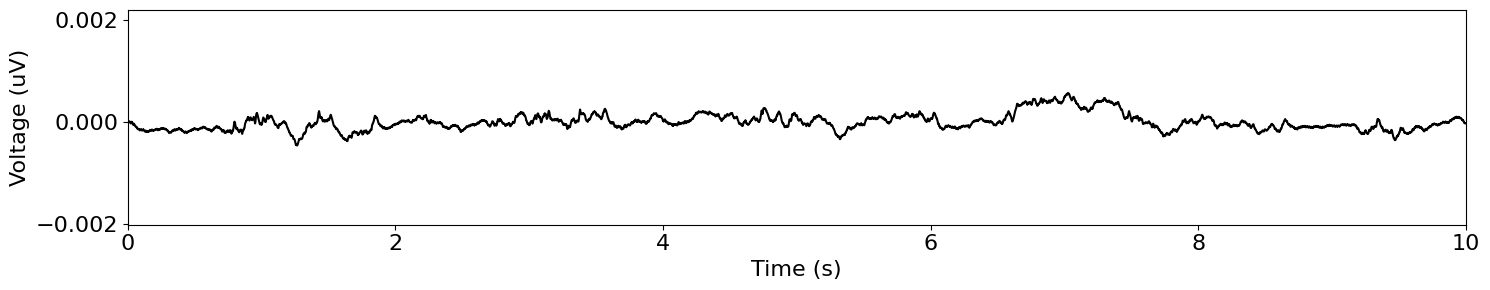

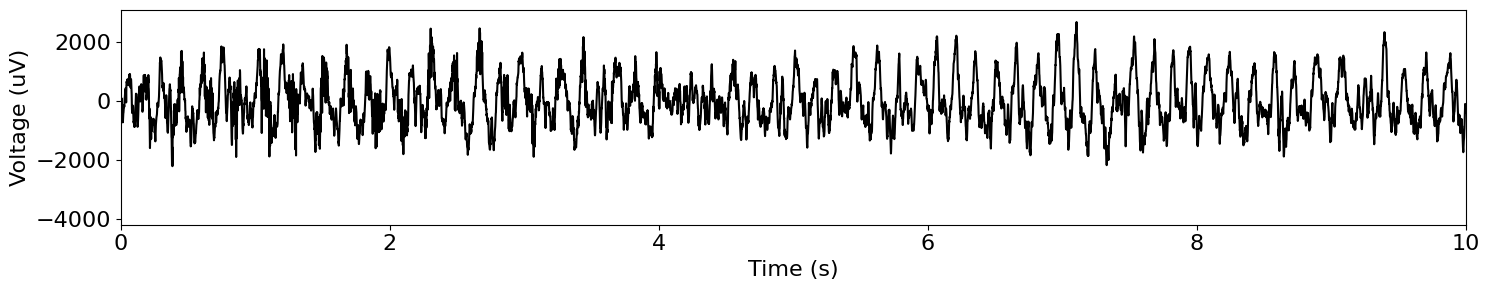

In [13]:
xlim = [0,10]
# plot time series
ts_1st_probe_times = data_1st_probe[1]
plot_time_series(ts_1st_probe_times, ts_1st_probe, xlim=xlim)
# Plot the loaded signal
plot_time_series(example_times, example_sig, xlim=xlim)

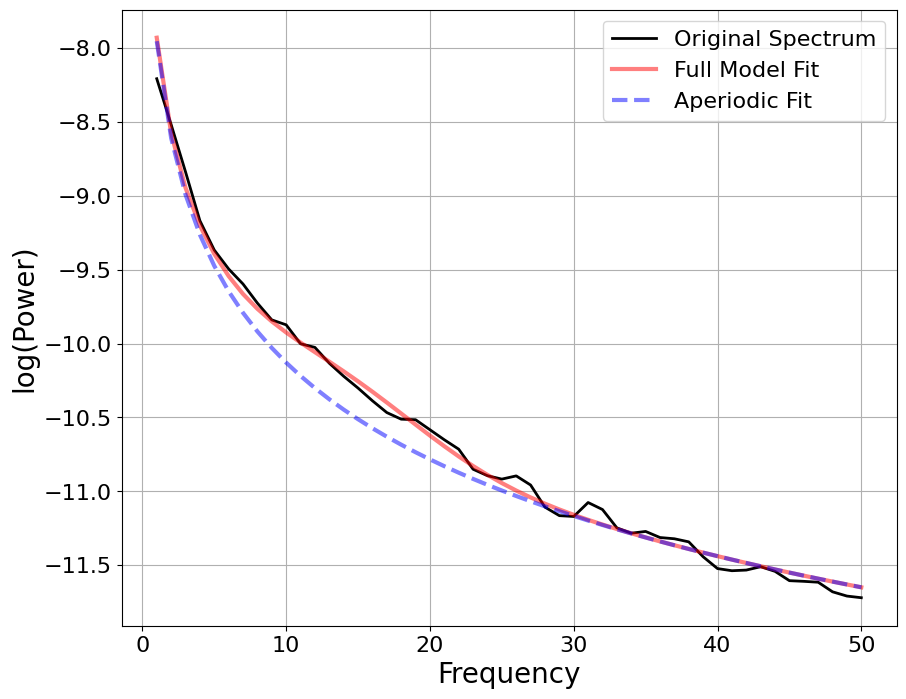

In [37]:
# take only times in the interval 1202 and 1205
freqs, powers = compute_spectrum_welch(ts_1st_probe[:140000], fs=1000)
# fit fooof model
fm = FOOOF(verbose=False)
fm.fit(freqs, powers, freq_range=[0,50])
# plot the periodic component
plot_fm(fm, plot_peaks=None, plot_aperiodic=True, plt_log=False, add_legend=True)

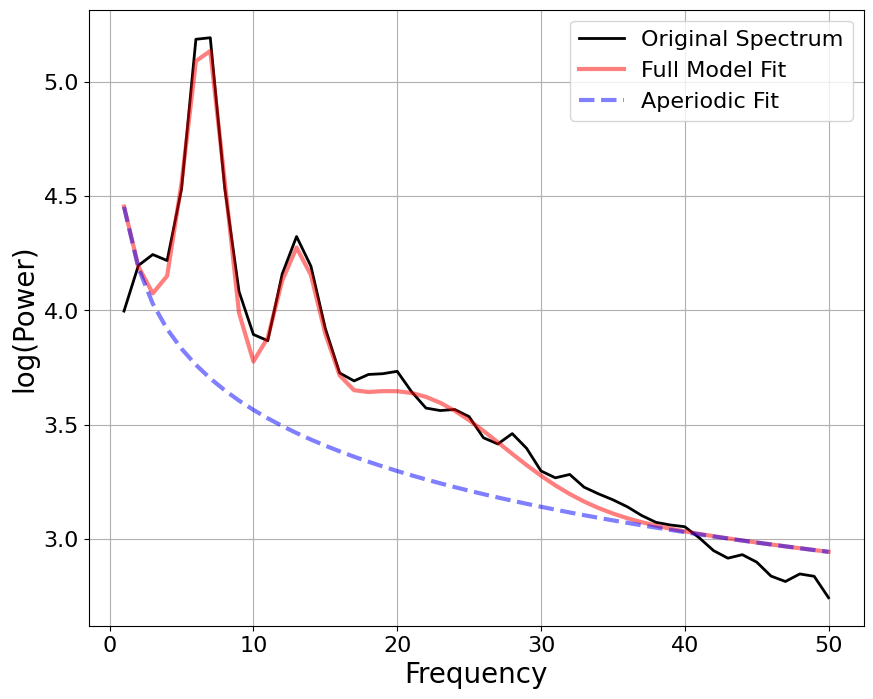

In [38]:
# take only times in the interval 1202 and 1205
freqs, powers = compute_spectrum_welch(example_sig, fs=1000)
# fit fooof model
fm = FOOOF(verbose=False)
fm.fit(freqs, powers, freq_range=[0,50])
# plot the periodic component
plot_fm(fm, plot_peaks=None, plot_aperiodic=True, plt_log=False, add_legend=True)

In [ ]:
# read the data
data = sorted(glob('raw/2022-09-27_data/1kHz/lfp*.ibw'))
# get 1st probe data
files_1st_probe = [d for d in data if int(d.split('/')[-1].split('.')[0].split('p')[-1]) >= 65 and int(d.split('/')[-1].split('.')[0].split('p')[-1]) <= 80]
# get 2nd probe data
files_2st_probe = [d for d in data if int(d.split('/')[-1].split('.')[0].split('p')[-1]) >= 97 and int(d.split('/')[-1].split('.')[0].split('p')[-1]) <= 112]

# load the data
data_1st_probe = [load_ibw_data(f)[0] for f in files_1st_probe]
data_2st_probe = [load_ibw_data(f)[0] for f in files_2st_probe]

times = load_ibw_data(files_1st_probe[0])[1]
# get the sampling rate
fs = data_1st_probe[0].sampling_rate

# get the time series
ts_1st_probe = [np.squeeze(d.magnitude) for d in data_1st_probe]
ts_2nd_probe = [np.squeeze(d.magnitude) for d in data_2st_probe]

In [38]:
# filter the data
ts_1st_probe_filtered = [filter_line_noise(ts, fs.magnitude, 550) for ts in ts_1st_probe]
ts_2nd_probe_filtered = [filter_line_noise(ts, fs.magnitude, 550) for ts in ts_2nd_probe]

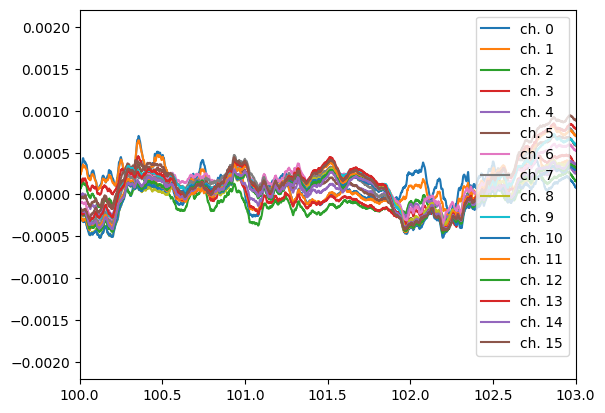

In [41]:
# plot time series
for i, ts in enumerate(ts_1st_probe_filtered):
    plt.plot(times, ts, label=f'ch. {i}')

plt.xlim([100, 103])
plt.legend(loc='upper right')
plt.show()

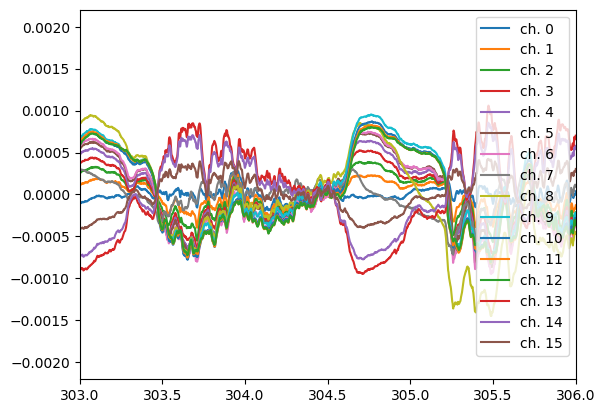

In [42]:
for i, ts in enumerate(ts_2nd_probe_filtered):
    plt.plot(times, ts, label=f'ch. {i}')

plt.xlim([303, 306])
plt.legend(loc='upper right')
plt.show()